# gwsurrogate demo

In [1]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline
import surfinBH
import warnings
warnings.filterwarnings("ignore")     # This is just for the demo, you may want to remove this

## Installation
#### PyPi
`pip install gwsurrogate`
#### Conda
`conda install -c conda-forge gwsurrogate`
#### Source
follow instructions in
`https://github.com/sxs-collaboration/gwsurrogate#from-source`

In [2]:
import gwsurrogate

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


## Available models

In [3]:
# NOTE: Only NRSur7dq4, NRHybSur3dq8 and NRHybSur3dq8Tidal are available through the following interface.
# We plan to move the other models to the same interface soon.
gwsurrogate.catalog.list()

EOBNRv2
SpEC_q1_10_NoSpin
SpEC_q1_10_NoSpin_linear
SpEC_q1_10_NoSpin_linear_alt
NRSur4d2s_TDROM_grid12
NRSur4d2s_FDROM_grid12
NRHybSur3dq8
NRSur7dq4
NRHybSur3dq8Tidal
EMRISur1dq1e4


In [4]:
model = 'NRSur7dq4'
print(gwsurrogate.catalog._surrogate_world[model].desc)
print(gwsurrogate.catalog._surrogate_world[model].refs)

Surrogate model for precessing binary black holes with mass ratios q<=4
  and spin magnitudes <=0.8. This model is presented in Varma et al. 2019,
  arxiv:1905.09300. All ell<=4 modes are included. The spin and frame dynamics
  are also modeled.
https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.1.033015


## Load your favorite model (this only needs to be done once at the start of a script)

In [5]:
sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

Loaded NRSur7dq4 model


## Read the documentation

In [6]:
help(sur)

Help on NRSur7dq4 in module gwsurrogate.surrogate object:

class NRSur7dq4(SurrogateEvaluator)
 |  NRSur7dq4(h5filename)
 |  
 |  A class for the NRSur7dq4 surrogate model presented in Varma et al. 2019,
 |  arxiv1905.09300.
 |  
 |  Evaluates gravitational waveforms generated by precessing binary black hole
 |  systems with generic mass ratios and spins.
 |  
 |  This model includes the following spin-weighted spherical harmonic modes:
 |  2<=ell<=4, -ell<=m<=ell.
 |  
 |  The parameter space of validity is:
 |  q \in [1, 6], and |chi1|,|chi2| \in [-1, 1], with generic directions.
 |  where q is the mass ratio and chi1/chi2 are the spin vectors of the
 |  heavier/lighter BH, respectively.
 |  
 |  The surrogate has been trained in the range
 |  q \in [1, 4] and |chi1|/|chi2| \in [-0.8, 0.8], but produces reasonable
 |  waveforms in the above range and has been tested against existing
 |  NR waveforms in that range.
 |  
 |  See the __call__ method on how to evaluate waveforms.
 |  In 

## Evaluate the waveform

### Evaluate waveform modes in dimensionless units (default)

In [7]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
dt = 0.1        # timestep size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)   # dyn stands for dynamics, do dyn.keys() to see contents

In [8]:
# Let's see all available modes
print(sorted(h.keys()))

[(2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3), (4, -4), (4, -3), (4, -2), (4, -1), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


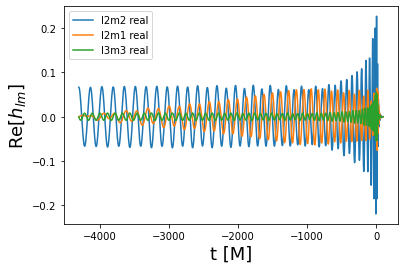

In [9]:
P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.plot(t, h[(3,3)].real, label='l3m3 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

### Evaluate waveform modes in MKS units

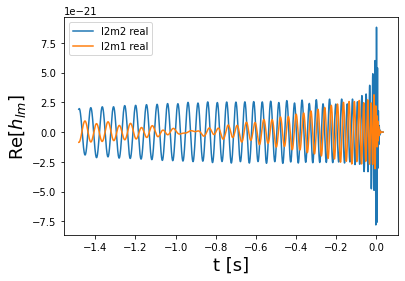

In [10]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
f_ref = 20         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use

# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')

P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()

### Evaluate waveform at a point on the sky

Text(0.5, 0, 't [s]')

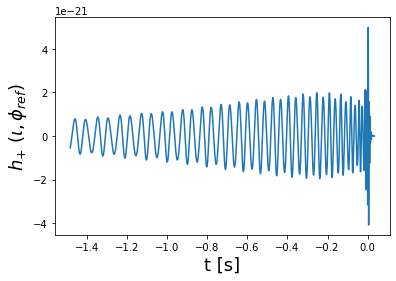

In [11]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
f_ref = 20         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use
inclination = np.pi/4
phi_ref = np.pi/5

# Will only include modes ell<=ellMax
# Returns h = h_+ -i h_x at (inclination, phi_ref) in the sky of the source frame
# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, 
           inclination=inclination, phi_ref=phi_ref, units='mks')

P.plot(t, h.real)
P.ylabel('$h_{+}$ $(\iota, \phi_{ref})$', fontsize=18)
P.xlabel('t [s]', fontsize=18)

## Dynamics Surrogate

In [12]:
q = 4
chiA = [-0.2, 0.4, 0.1]  # unless f_ref is given the spins are assumed to be given at the start of the waveform
chiB = [-0.5, 0.2, -0.4]
dt = 0.1        # step size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, precessing_opts={'return_dynamics': True})        # dyn stands for dynamics, do dyn.keys() to see contents

In [13]:
# See all available dynamics data
dyn.keys()

dict_keys(['chiA', 'chiB', 'q_copr', 'orbphase'])

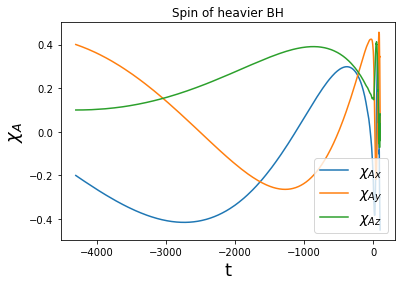

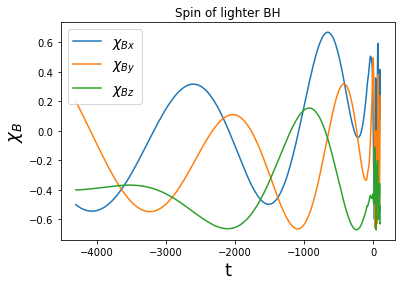

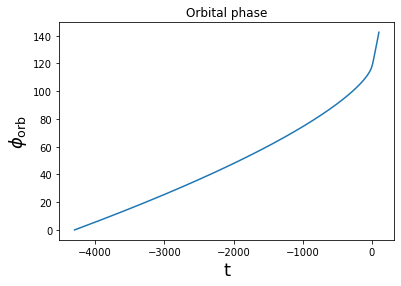

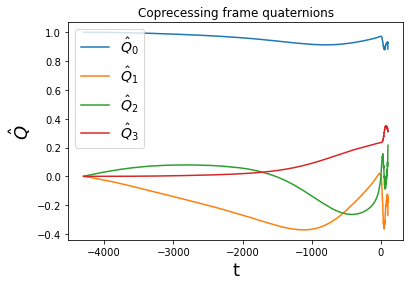

In [14]:
P.figure(1)
P.plot(t, dyn['chiA'][:,0], label='$\chi_{Ax}$')
P.plot(t, dyn['chiA'][:,1], label='$\chi_{Ay}$')
P.plot(t, dyn['chiA'][:,2], label='$\chi_{Az}$')
P.ylabel('$\chi_A$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of heavier BH')
P.legend(fontsize=14)

P.figure(2)
P.plot(t, dyn['chiB'][:,0], label='$\chi_{Bx}$')
P.plot(t, dyn['chiB'][:,1], label='$\chi_{By}$')
P.plot(t, dyn['chiB'][:,2], label='$\chi_{Bz}$')
P.ylabel('$\chi_B$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Spin of lighter BH')
P.legend(fontsize=14)

P.figure(3)
P.plot(t, dyn['orbphase'][:,])
P.ylabel('$\phi_{\mathrm{orb}}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Orbital phase')

P.figure(4)
P.plot(t, dyn['q_copr'][0,:], label='$\hat{Q}_0$')
P.plot(t, dyn['q_copr'][1,:], label='$\hat{Q}_1$')
P.plot(t, dyn['q_copr'][2,:], label='$\hat{Q}_2$')
P.plot(t, dyn['q_copr'][3,:], label='$\hat{Q}_3$')
P.ylabel('$\hat{Q}$', fontsize=18)
P.xlabel('t', fontsize=18)
P.title('Coprecessing frame quaternions')
P.legend(fontsize=14)

## Exercise 1: How much did the orbital plane of GW190521 precess (with a lot of caveats)?

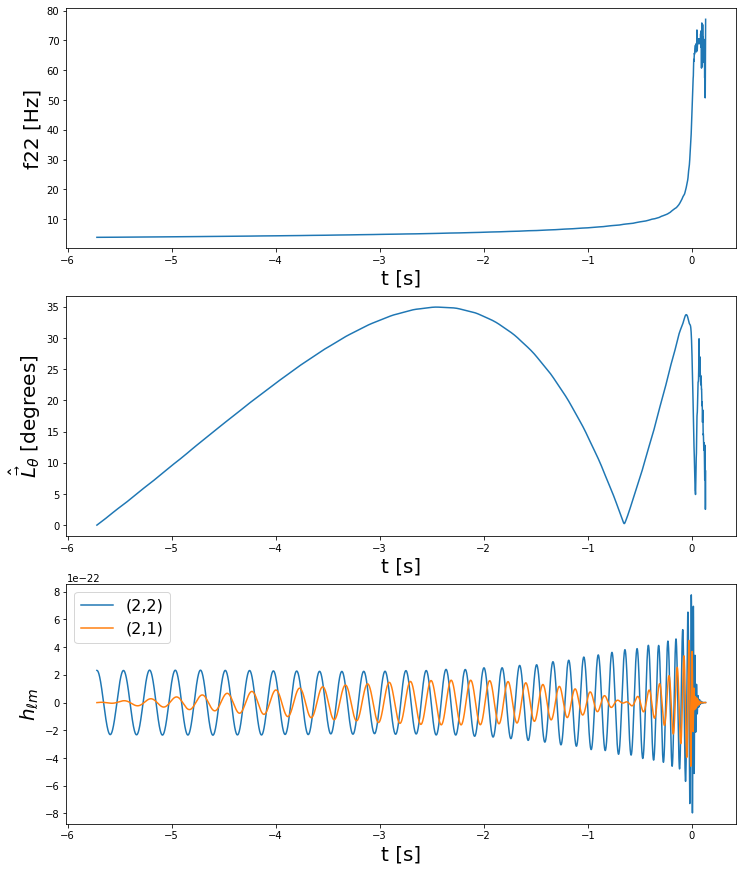

In [15]:
# NOTE: These parameters are only kind of consistent with GW190521, not necessarily the "true" source parameters.
# In addition, this is also based on the assumption that the source was a noneccentric BBH merger.
# See https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.125.101102 for more details.
M = 270.                           # Detector frame total mass (MSun)
q = 1.26                           # Mass ratio
chiA = [0, 0.69, 0]                # Dimensionless spin of heavier BH
chiB = [0, 0.73, 0]                # Dimensionless spin of lighter BH
dist_mpc = 5300.                   # Luminosity distance (Mpc)
dt = 1./4096.                      # Time step (sec)
f_ref = 0                          # Reference frequency at which spins are defined (0 means at initial time)
f_low = 0                          # Start frequency (0 means use full surrogate)
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, M=M, \
    dist_mpc=dist_mpc, units='mks', precessing_opts={'return_dynamics': True})

# Orbital angular momentum direction
LHat = surfinBH._utils.lHat_from_quat(dyn['q_copr']).T
# Polar angle (theta) of Lhat in spherical coordinates
LTheta = np.arccos(LHat.T[2]/np.linalg.norm(LHat, axis=1))

orbphase = dyn['orbphase'] 
freq22 = np.gradient(orbphase,t)/np.pi  # GW frequency ((2,2) mode frequency in the coprecessing frame to be precise)

fig, axarr = P.subplots(3,1,figsize=(12, 15))
P.subplots_adjust(hspace=0.2, wspace=0.2)

ax = axarr[0]
ax.plot(t, freq22)
ax.set_ylabel('f22 [Hz]', fontsize=20)
ax.set_xlabel('t [s]', fontsize=20)

ax = axarr[1]
ax.plot(t, LTheta*180/np.pi)
ax.set_ylabel('$\hat{\\vec{L}}_{\\theta}$ [degrees]', fontsize=20)
ax.set_xlabel('t [s]', fontsize=20)

ax = axarr[2]
ax.plot(t, h[(2,2)], label='(2,2)')
ax.plot(t, h[(2,1)], label='(2,1)')
ax.set_ylabel('$h_{\ell m}$', fontsize=20)
ax.set_xlabel('t [s]', fontsize=20)
ax.legend(loc='upper left', fontsize=16)     